# 1. 数据分组
* 数据分组运算的核心模式是split-apply-combine，即先按照某一标准将数据分片，然后对各个片分别定义进行运算，然后将运算结果组合形成新的数据集

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

In [3]:
tips=sns.load_dataset("tips")

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.2 KB


In [6]:
tips.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [16]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


## GroupBy Object简介
* 单键值分组
* 多键值分组：传入一个键组成的列表参数
* GroupBy Object是可迭代的（name，data）二元元组

In [8]:
grouped=tips["tip"].groupby(tips["sex"])

In [10]:
grouped

In [15]:
grouped.mean()
# grouped是个分组对象 GroupBy Object

sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64

* 多键值分组：传入一个键组成的列表参数

In [12]:
date_mean=tips["tip"].groupby([tips["day"],tips["time"]]).mean()

In [13]:
date_mean

day   time  
Thur  Lunch     2.767705
      Dinner    3.000000
Fri   Lunch     2.382857
      Dinner    2.940000
Sat   Dinner    2.993103
Sun   Dinner    3.255132
Name: tip, dtype: float64

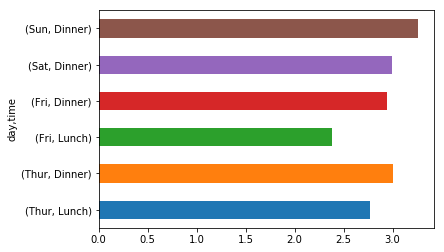

In [14]:
date_mean.plot(kind="barh")

* GroupBy Object是可迭代的（name，data）二元元组

In [17]:
for name,data in tips.groupby(tips["sex"]):
    print("the name of this group is {}".format(name))
    print(data)

the name of this group is Male
     total_bill   tip   sex smoker   day    time  size
1         10.34  1.66  Male     No   Sun  Dinner     3
2         21.01  3.50  Male     No   Sun  Dinner     3
3         23.68  3.31  Male     No   Sun  Dinner     2
5         25.29  4.71  Male     No   Sun  Dinner     4
6          8.77  2.00  Male     No   Sun  Dinner     2
7         26.88  3.12  Male     No   Sun  Dinner     4
8         15.04  1.96  Male     No   Sun  Dinner     2
9         14.78  3.23  Male     No   Sun  Dinner     2
10        10.27  1.71  Male     No   Sun  Dinner     2
12        15.42  1.57  Male     No   Sun  Dinner     2
13        18.43  3.00  Male     No   Sun  Dinner     4
15        21.58  3.92  Male     No   Sun  Dinner     2
17        16.29  3.71  Male     No   Sun  Dinner     3
19        20.65  3.35  Male     No   Sat  Dinner     3
20        17.92  4.08  Male     No   Sat  Dinner     2
23        39.42  7.58  Male     No   Sat  Dinner     4
24        19.82  3.18  Male     No

In [18]:
tips.groupby(tips["sex"]).size()

sex
Male      157
Female     87
dtype: int64

## 按列名分组

In [19]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [20]:
smoker_mean=tips.groupby("smoker").mean()

In [21]:
smoker_mean

,total_bill,tip,size
smoker,,,
Yes,20.756344,3.008710,2.408602
No,19.188278,2.991854,2.668874


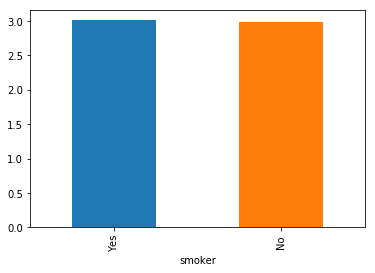

In [22]:
smoker_mean["tip"].plot(kind="bar")

In [23]:
size_mean_1=tips["tip"].groupby(tips["size"]).mean()

In [24]:
size_mean_1

size
1    1.437500
2    2.582308
3    3.393158
4    4.135405
5    4.028000
6    5.225000
Name: tip, dtype: float64

In [25]:
size_mean_2=tips.groupby(tips["size"])["tip"].mean()

In [26]:
size_mean_2

size
1    1.437500
2    2.582308
3    3.393158
4    4.135405
5    4.028000
6    5.225000
Name: tip, dtype: float64

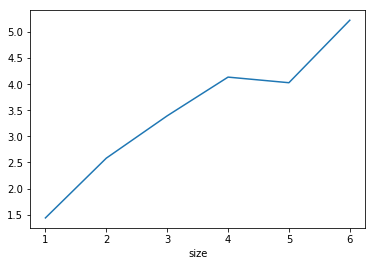

In [33]:
size_mean_1.plot()

## 按列表或元组分组
* 即把列表或是字典当做DataFrame的一列，然后按期其分组

In [35]:
df=pd.DataFrame(np.arange(16).reshape(4,4))

In [36]:
df

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15


In [37]:
list1=list("abab")

In [39]:
list1

['a', 'b', 'a', 'b']

In [40]:
df.groupby(list1).sum()

,0,1,2,3
a,8,10,12,14
b,16,18,20,22


## 按字典分组
* 用字典强制指定分组信息，指定索引的那些行属于哪个分组，其中字典的键为原来DataFrame的行索引，值为被分到的组名

In [41]:
df1=pd.DataFrame(np.random.normal(size=(6,6)),index=list("abcABC"))

In [42]:
df1

,0,1,2,3,4,5
a,0.875002,0.758109,1.294069,0.909857,-0.838358,-0.156781
b,0.803847,0.018072,0.571437,2.067042,-1.432928,0.028026
c,0.145067,-1.517058,-1.140251,0.053885,-1.439276,0.814813
A,0.233516,-0.470889,1.520973,0.124792,-0.036441,0.798339
B,0.124836,0.550739,-1.071868,0.206881,0.078563,0.525046
C,0.901611,-0.573464,0.468721,-1.026660,-1.707410,-0.768557


In [44]:
dict1={
    'a':'one',
    'b':'two',
    'c':'three',
    'A':'one',
    'B':'two',
    'C':'three'
}
df1.groupby(dict1).sum()

,0,1,2,3,4,5
one,1.108518,0.287220,2.815042,1.034649,-0.874799,0.641558
three,1.046677,-2.090522,-0.671530,-0.972775,-3.146686,0.046256
two,0.928683,0.568811,-0.500431,2.273922,-1.354366,0.553072


## 按照函数分组

In [45]:
def judge(x):
    if(x>=0):
        return 'a'
    else:
        return 'b'

In [47]:
df1[5].groupby(df1[5].map(judge)).sum()

5
a    2.166223
b   -0.925338
Name: 5, dtype: float64

In [49]:
df1.groupby(df1[5].map(judge)).sum()

,0,1,2,3,4,5
5,,,,,,
a,1.307266,-1.419136,-0.119709,2.452599,-2.830083,2.166223
b,1.776612,0.184645,1.762790,-0.116803,-2.545768,-0.925338


## 含有参差话索引的数据可以设置level参数按照不同索引层级分组

In [51]:
df2=pd.DataFrame(np.arange(16).reshape(4,4),
                 index=[["one","one","two","two"],["a","b","a","b"]],
                columns=[["apple","apple","orange","orange"],["red","green","red","green"]])

In [52]:
df2

apple       orange      
        red green    red green
one a     0     1      2     3
    b     4     5      6     7
two a     8     9     10    11
    b    12    13     14    15

In [53]:
df2.groupby(level=0).sum()

apple       orange      
      red green    red green
one     4     6      8    10
two    20    22     24    26

In [54]:
df2.groupby(level=1).sum()

apple       orange      
    red green    red green
a     8    10     12    14
b    16    18     20    22

In [55]:
df2.groupby(level=1,axis=1).sum()

green  red
one a      4    2
    b     12   10
two a     20   18
    b     28   26

In [56]:
df2.groupby(level=0,axis=1).sum()

apple  orange
one a      1       5
    b      9      13
two a     17      21
    b     25      29

# 2. 聚合运算

## 常用聚合运算方法
* count 计数
* sum 求和
* mean 求平均值
* median 算术中位数
* std, var 无偏标准差与方差
* min, max 最小值与最大值
* prod 乘积
* first,last 第一个值与最后一个值

In [58]:
max_tip1=tips["tip"].groupby(tips["sex"]).max()

In [59]:
max_tip1

sex
Male      10.0
Female     6.5
Name: tip, dtype: float64

In [60]:
max_tip2=tips.groupby("sex")["tip"].max()

In [61]:
max_tip2

sex
Male      10.0
Female     6.5
Name: tip, dtype: float64

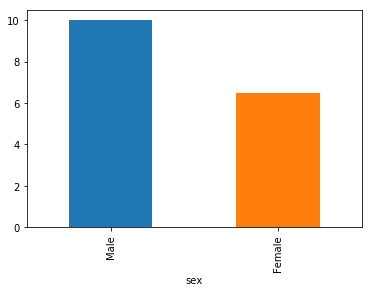

In [62]:
max_tip2.plot(kind="bar")

In [64]:
# 分位数运算
df3=pd.DataFrame(np.arange(16).reshape(4,4))
list2=list("abab")

In [65]:
df3

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15


In [66]:
df3.groupby(list2).quantile(0.5)

0.5,0,1,2,3
a,4.0,5.0,6.0,7.0
b,8.0,9.0,10.0,11.0


In [67]:
# 自定义的聚合函数，通过aggregate或者agg参数传递
def get_range(x):
    return x.max()-x.min()

In [68]:
tips_range=tips.groupby("sex").agg(get_range)

In [69]:
tips_range

,total_bill,tip,size
sex,,,
Male,43.56,9.0,5
Female,41.23,5.5,5


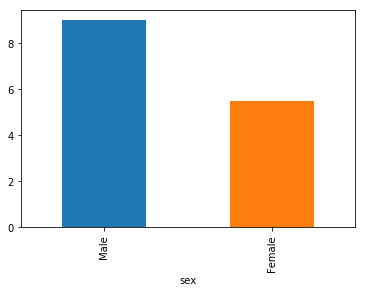

In [70]:
tips_range["tip"].plot(kind="bar")

## 多函数应用
* 一列多函数
* 多列多函数
* 不同列不同函数

In [71]:
tips.groupby(["sex","smoker"])["tip"].agg(["mean","std","var",get_range])

mean       std       var  get_range
sex    smoker                                         
Male   Yes     3.051167  1.500120  2.250360       9.00
       No      3.113402  1.489559  2.218785       7.75
Female Yes     2.931515  1.219916  1.488195       5.50
       No      2.773519  1.128425  1.273344       4.20

In [72]:
tips.groupby(["sex","smoker"])["tip"].agg([("tip_mean","mean"),("range",get_range)])

tip_mean  range
sex    smoker                 
Male   Yes     3.051167   9.00
       No      3.113402   7.75
Female Yes     2.931515   5.50
       No      2.773519   4.20

In [73]:
tips.groupby(["sex","smoker"]).agg([("tip_mean","mean"),("range",get_range)])
# 多列多函数会产生层次化索引

total_bill              tip            size      
                tip_mean  range  tip_mean range  tip_mean range
sex    smoker                                                  
Male   Yes     22.284500  43.56  3.051167  9.00  2.500000     4
       No      19.791237  40.82  3.113402  7.75  2.711340     4
Female Yes     17.977879  41.23  2.931515  5.50  2.242424     3
       No      18.105185  28.58  2.773519  4.20  2.592593     5

In [74]:
# 不同列不同函数时定义字典来表达映射关系
tips.groupby(["day","time"])["total_bill","tip"].agg({"total_bill":"sum","tip":"mean"})

total_bill       tip
day  time                        
Thur Lunch      1077.55  2.767705
     Dinner       18.78  3.000000
Fri  Lunch        89.92  2.382857
     Dinner      235.96  2.940000
Sat  Dinner     1778.40  2.993103
Sun  Dinner     1627.16  3.255132

In [78]:
tips.groupby(["day","time"])["total_bill","tip"].agg({"total_bill":["mean","sum",get_range,],"tip":"mean"})

total_bill                          tip
                  mean      sum get_range      mean
day  time                                          
Thur Lunch   17.664754  1077.55     35.60  2.767705
     Dinner  18.780000    18.78      0.00  3.000000
Fri  Lunch   12.845714    89.92      7.69  2.382857
     Dinner  19.663333   235.96     34.42  2.940000
Sat  Dinner  20.441379  1778.40     47.74  2.993103
Sun  Dinner  21.410000  1627.16     40.92  3.255132

In [79]:
yes_index=tips.groupby(["sex","smoker"])["tip"].mean()
no_index=tips.groupby(["sex","smoker"],as_index=False)["tip"].mean()

In [80]:
yes_index

sex     smoker
Male    Yes       3.051167
        No        3.113402
Female  Yes       2.931515
        No        2.773519
Name: tip, dtype: float64

In [77]:
no_index

,sex,smoker,tip
0,Male,Yes,3.051167
1,Male,No,3.113402
2,Female,Yes,2.931515
3,Female,No,2.773519


# 3. 分组运算

In [81]:
df4=pd.DataFrame(tips.groupby("sex")["tip"].mean())

In [82]:
df4

,tip
sex,
Male,3.089618
Female,2.833448


In [84]:
new_tips=pd.merge(tips,df4,left_on="sex",right_index=True)

In [87]:
new_tips.head(10)

,total_bill,tip_x,sex,smoker,day,time,size,tip_y
0,16.99,1.01,Female,No,Sun,Dinner,2,2.833448
4,24.59,3.61,Female,No,Sun,Dinner,4,2.833448
11,35.26,5.00,Female,No,Sun,Dinner,4,2.833448
14,14.83,3.02,Female,No,Sun,Dinner,2,2.833448
16,10.33,1.67,Female,No,Sun,Dinner,3,2.833448
18,16.97,3.50,Female,No,Sun,Dinner,3,2.833448
21,20.29,2.75,Female,No,Sat,Dinner,2,2.833448
22,15.77,2.23,Female,No,Sat,Dinner,2,2.833448
29,19.65,3.00,Female,No,Sat,Dinner,2,2.833448
32,15.06,3.00,Female,No,Sat,Dinner,2,2.833448


In [88]:
tips.groupby("sex")["tip"].transform("mean")

0      2.833448
1      3.089618
2      3.089618
3      3.089618
4      2.833448
5      3.089618
6      3.089618
7      3.089618
8      3.089618
9      3.089618
10     3.089618
11     2.833448
12     3.089618
13     3.089618
14     2.833448
15     3.089618
16     2.833448
17     3.089618
18     2.833448
19     3.089618
20     3.089618
21     2.833448
22     2.833448
23     3.089618
24     3.089618
25     3.089618
26     3.089618
27     3.089618
28     3.089618
29     2.833448
         ...   
214    2.833448
215    2.833448
216    3.089618
217    3.089618
218    3.089618
219    2.833448
220    3.089618
221    2.833448
222    3.089618
223    2.833448
224    3.089618
225    2.833448
226    2.833448
227    3.089618
228    3.089618
229    2.833448
230    3.089618
231    3.089618
232    3.089618
233    3.089618
234    3.089618
235    3.089618
236    3.089618
237    3.089618
238    2.833448
239    3.089618
240    2.833448
241    3.089618
242    3.089618
243    2.833448
Name: tip, Length: 244, 

In [89]:
def top(x,n=5):
    return x.sort_values(by="tip",ascending=False)[-n:]

In [90]:
tips.groupby("sex").apply(top)

total_bill   tip     sex smoker  day    time  size
sex                                                           
Male   43         9.68  1.32    Male     No  Sun  Dinner     2
       235       10.07  1.25    Male     No  Sat  Dinner     2
       75        10.51  1.25    Male     No  Sat  Dinner     2
       237       32.83  1.17    Male    Yes  Sat  Dinner     2
       236       12.60  1.00    Male    Yes  Sat  Dinner     2
Female 215       12.90  1.10  Female    Yes  Sat  Dinner     2
       0         16.99  1.01  Female     No  Sun  Dinner     2
       111        7.25  1.00  Female     No  Sat  Dinner     1
       67         3.07  1.00  Female    Yes  Sat  Dinner     1
       92         5.75  1.00  Female    Yes  Fri  Dinner     2

In [92]:
tips.groupby("sex",group_keys=False).apply(top)

,total_bill,tip,sex,smoker,day,time,size
43,9.68,1.32,Male,No,Sun,Dinner,2
235,10.07,1.25,Male,No,Sat,Dinner,2
75,10.51,1.25,Male,No,Sat,Dinner,2
237,32.83,1.17,Male,Yes,Sat,Dinner,2
236,12.60,1.00,Male,Yes,Sat,Dinner,2
215,12.90,1.10,Female,Yes,Sat,Dinner,2
0,16.99,1.01,Female,No,Sun,Dinner,2
111,7.25,1.00,Female,No,Sat,Dinner,1
67,3.07,1.00,Female,Yes,Sat,Dinner,1
92,5.75,1.00,Female,Yes,Fri,Dinner,2


In [94]:
data={
    "name":["zhangsan","lisi","peter","wangwu","xiaoming","xiaohong"],
    "sex":["female","female","male","male","male","female"],
    "math":[67,72,np.nan,82,90,np.nan]
}
df5=pd.DataFrame(data)

In [95]:
df5

,name,sex,math
0,zhangsan,female,67.0
1,lisi,female,72.0
2,peter,male,NaN
3,wangwu,male,82.0
4,xiaoming,male,90.0
5,xiaohong,female,NaN


In [96]:
df5.fillna(df5["math"].mean())

,name,sex,math
0,zhangsan,female,67.00
1,lisi,female,72.00
2,peter,male,77.75
3,wangwu,male,82.00
4,xiaoming,male,90.00
5,xiaohong,female,77.75


In [98]:
f=lambda x:x.fillna(x.mean())
df5.groupby("sex").apply(f)

name     sex  math
sex                             
female 0  zhangsan  female  67.0
       1      lisi  female  72.0
       5  xiaohong  female  69.5
male   2     peter    male  86.0
       3    wangwu    male  82.0
       4  xiaoming    male  90.0

In [99]:
f=lambda x:x.fillna(x.mean())
df5.groupby("sex",as_index=False).apply(f)

name     sex  math
0 0  zhangsan  female  67.0
  1      lisi  female  72.0
  5  xiaohong  female  69.5
1 2     peter    male  86.0
  3    wangwu    male  82.0
  4  xiaoming    male  90.0

In [100]:
f=lambda x:x.fillna(x.mean())
df5.groupby("sex",as_index=False).apply(f).sort_index(level=1)

name     sex  math
0 0  zhangsan  female  67.0
  1      lisi  female  72.0
1 2     peter    male  86.0
  3    wangwu    male  82.0
  4  xiaoming    male  90.0
0 5  xiaohong  female  69.5

In [103]:
f=lambda x:x.fillna(x.mean())
df5.groupby("sex",as_index=False).apply(f).sort_values(by="math",ascending=False)

name     sex  math
1 4  xiaoming    male  90.0
  2     peter    male  86.0
  3    wangwu    male  82.0
0 1      lisi  female  72.0
  5  xiaohong  female  69.5
  0  zhangsan  female  67.0

# 4. 数据透视表

## 透视表

In [105]:
tips.pivot_table(values="tip",index="sex",columns="smoker")

smoker,No,Yes
sex,,
Female,2.773519,2.931515
Male,3.113402,3.051167


In [107]:
tips.pivot_table(values="tip",index="sex",columns="smoker",aggfunc="sum")

smoker,No,Yes
sex,,
Female,149.77,96.74
Male,302.00,183.07


In [108]:
tips.pivot_table(values="tip",index="sex",columns="smoker",aggfunc="median")

smoker,No,Yes
sex,,
Female,2.68,2.88
Male,2.74,3.00


In [109]:
tips.pivot_table(values="tip",index="sex",columns="smoker",aggfunc="sum",margins=True)

smoker,No,Yes,All
sex,,,
Female,149.77,96.74,246.51
Male,302.00,183.07,485.07
All,451.77,279.81,731.58


## 交叉表

In [110]:
cross_table=pd.crosstab(index=tips["day"],columns=tips["size"])

In [111]:
cross_table

size,1,2,3,4,5,6
day,,,,,,
Sun,0,39,15,18,3,1
Sat,2,53,18,13,1,0
Thur,1,48,4,5,1,3
Fri,1,16,1,1,0,0


In [112]:
df6=cross_table.div(cross_table.sum(1),axis=0)

In [113]:
df6

size,1,2,3,4,5,6
day,,,,,,
Sun,0.000000,0.513158,0.197368,0.236842,0.039474,0.013158
Sat,0.022989,0.609195,0.206897,0.149425,0.011494,0.000000
Thur,0.016129,0.774194,0.064516,0.080645,0.016129,0.048387
Fri,0.052632,0.842105,0.052632,0.052632,0.000000,0.000000


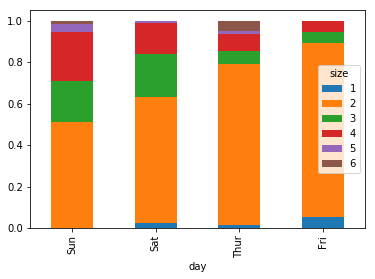

In [114]:
df6.plot(kind="bar",stacked=True)

# 5. 综合实例——巴尔的摩公务员工资数据集

In [115]:
import numpy as np
import pandas as pd
%matplotlib inline

In [142]:
salary=pd.read_csv("./data/baltimore_City_Employee_Salaries_FY2016.csv")

In [143]:
salary.head()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
0,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev (031),10/24/1979 12:00:00 AM,$56705.00,$54135.44
1,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29045,States Attorneys Office (045),09/25/2006 12:00:00 AM,$75500.00,$72445.87
2,"Abbey,Emmanuel",CONTRACT SERV SPEC II,A40001,M-R Info Technology (001),05/01/2013 12:00:00 AM,$60060.00,$59602.58
3,"Abbott-Cole,Michelle",Operations Officer III,A90005,TRANS-Traffic (005),11/28/2014 12:00:00 AM,$70000.00,$59517.21
4,"Abdal-Rahim,Naim A",EMT Firefighter Suppression,A64120,Fire Department (120),03/30/2011 12:00:00 AM,$64365.00,$74770.82


In [144]:
salary.shape

(13818, 7)

In [145]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13818 entries, 0 to 13817
Data columns (total 7 columns):
Name            13818 non-null object
JobTitle        13818 non-null object
AgencyID        13818 non-null object
Agency          13818 non-null object
HireDate        13818 non-null object
AnnualSalary    13818 non-null object
GrossPay        13546 non-null object
dtypes: object(7)
memory usage: 755.8+ KB


In [146]:
salary.isnull().sum()

Name              0
JobTitle          0
AgencyID          0
Agency            0
HireDate          0
AnnualSalary      0
GrossPay        272
dtype: int64

In [147]:
salary.describe()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
count,13818,13818,13818,13818,13818,13818,13546
unique,13669,1037,681,680,4720,1771,13189
top,"Johnson,Cynthia",POLICE OFFICER,P04001,R&P-Recreation (part-time) (,06/23/2007 12:00:00 AM,$20800.00,$0.00
freq,3,1758,413,618,66,294,135


In [149]:
salary['AnnualSalary']=salary["AnnualSalary"].str.strip('$').astype(np.float)
salary['GrossPay']=salary['GrossPay'].str.strip('$').astype(np.float)

In [151]:
salary.drop_duplicates(inplace=True)
func=lambda x:x.fillna(x.mean())
salary["GrossPay"]=salary.groupby("JobTitle")["GrossPay"].apply(func)

In [152]:
salary.shape

(13818, 7)

In [153]:
salary.isnull().sum()

Name            0
JobTitle        0
AgencyID        0
Agency          0
HireDate        0
AnnualSalary    0
GrossPay        3
dtype: int64

In [154]:
salary.head(5)

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
0,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev (031),10/24/1979 12:00:00 AM,56705.0,54135.44
1,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29045,States Attorneys Office (045),09/25/2006 12:00:00 AM,75500.0,72445.87
2,"Abbey,Emmanuel",CONTRACT SERV SPEC II,A40001,M-R Info Technology (001),05/01/2013 12:00:00 AM,60060.0,59602.58
3,"Abbott-Cole,Michelle",Operations Officer III,A90005,TRANS-Traffic (005),11/28/2014 12:00:00 AM,70000.0,59517.21
4,"Abdal-Rahim,Naim A",EMT Firefighter Suppression,A64120,Fire Department (120),03/30/2011 12:00:00 AM,64365.0,74770.82


In [155]:
salary.GrossPay.dtype

dtype('float64')

In [156]:
salary['month']=salary['HireDate'].str.split('/').str[0]

In [157]:
salary.head()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay,month
0,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev (031),10/24/1979 12:00:00 AM,56705.0,54135.44,10
1,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29045,States Attorneys Office (045),09/25/2006 12:00:00 AM,75500.0,72445.87,09
2,"Abbey,Emmanuel",CONTRACT SERV SPEC II,A40001,M-R Info Technology (001),05/01/2013 12:00:00 AM,60060.0,59602.58,05
3,"Abbott-Cole,Michelle",Operations Officer III,A90005,TRANS-Traffic (005),11/28/2014 12:00:00 AM,70000.0,59517.21,11
4,"Abdal-Rahim,Naim A",EMT Firefighter Suppression,A64120,Fire Department (120),03/30/2011 12:00:00 AM,64365.0,74770.82,03


## 数据探索

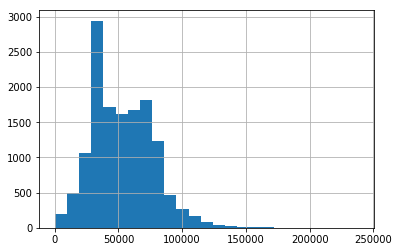

In [158]:
salary["AnnualSalary"].hist(bins=25)
# 通过年薪的直方图可以看到基本呈现正态分布，略向左倾斜，说明高工资的职位还是比较少的

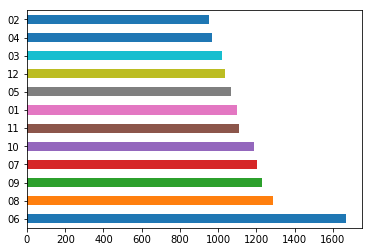

In [159]:
month_count=salary["month"].value_counts()
month_count.plot(kind="barh")
# 可以看到入职高峰期为6,8,9三个月

In [161]:
agg_salary=salary.groupby("JobTitle")["AnnualSalary"].agg(["mean","count"])

In [163]:
agg_salary

,mean,count
JobTitle,,
911 LEAD OPERATOR,49816.750000,4
911 OPERATOR,44829.461538,65
911 OPERATOR SUPERVISOR,57203.500000,4
ACCOUNT EXECUTIVE,57200.000000,4
ACCOUNTANT I,49065.866667,15
ACCOUNTANT II,58172.640000,25
ACCOUNTANT SUPV,67417.142857,7
ACCOUNTANT TRAINEE,36681.000000,1
ACCOUNTING ASST I,29226.333333,6


In [164]:
sort_salary=agg_salary.sort_values(by='mean',ascending=False)[:5]

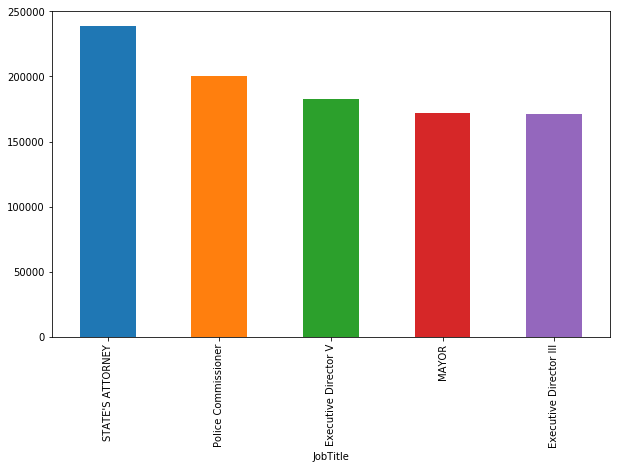

In [167]:
sort_salary["mean"].plot(kind="bar",figsize=(10,6))

In [168]:
sort_count=agg_salary.sort_values(by="count",ascending=False)[:5]

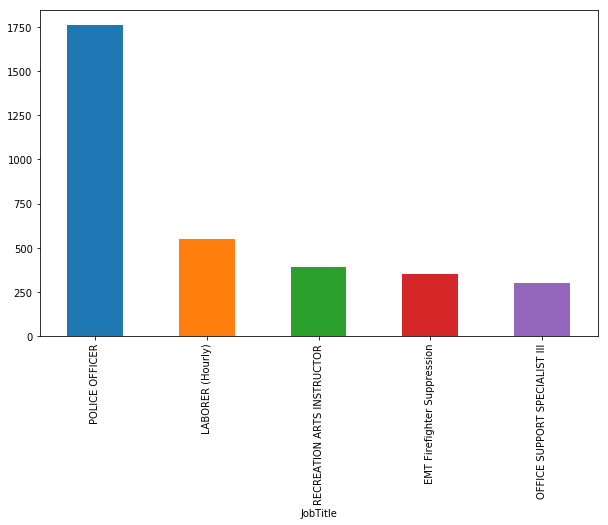

In [169]:
sort_count["count"].plot(kind="bar",figsize=(10,6))